## Boston 주택 가격 예측 모델
Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다.

데이터셋의 feature에 대한 설명
feature	설명
CRIM	자치시별 1인당 범죄율
    ZN	25,000 평방피트를 초과하는 거주지역의 비율
INDUS	비소매상업지역이 점유하고 있는 토지의 비율
CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
    NOX	10ppm 당 농축 일산화질소
    RM	주택 1 가구당 평균 방의 개수
    AGE	1940년 이전에 건축된 소유주택의 비율
    DIS	5개의 보스턴 직업센터까지의 접근성 지수
    RAD	방사형 도로까지의 접근성 지수
    TAX	10,000 달러당 재산세율
PTRATIO	자치시(town)별 학생/교사 비율
    B	1000(Bk−0.63)2
1000(Bk−0.63) 
2
 , 여기서Bk는 자치시별 흑인의 비율을 말함
LSTAT	모집단의 하위계층의 비율(%)
MEDV	본인 소유의 주택가격(중앙값)(단위: $1,000)

### 데이터 로드 및 전처리
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils
import matplotlib.pyplot as plt

In [32]:
# keras.datasets 안의 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data), len(train_labels))
print(len(test_data), len(test_labels))

404 404
102 102


In [33]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다
# 데이터 특성의 중앙이 0에 가깝게 만들고 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고 표준편차를 나눕니다
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [34]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일 합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(train_data.shape[1],)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


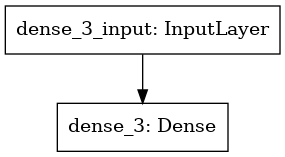

In [35]:
utils.plot_model(model)

In [36]:
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

### 모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [37]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=40, batch_size=128, validation_data=(test_data, test_labels))

Epoch 1/40
4/4 [==============================] - 0s 32ms/step - loss: 542.8224 - mae: 21.9131 - val_loss: 494.9179 - val_mae: 21.0621
Epoch 2/40
4/4 [==============================] - 0s 7ms/step - loss: 460.5232 - mae: 20.2380 - val_loss: 426.0957 - val_mae: 19.4410
Epoch 3/40
4/4 [==============================] - 0s 7ms/step - loss: 398.4227 - mae: 18.6920 - val_loss: 364.6784 - val_mae: 17.9367
Epoch 4/40
4/4 [==============================] - 0s 7ms/step - loss: 341.4125 - mae: 17.2303 - val_loss: 310.8202 - val_mae: 16.5087
Epoch 5/40
4/4 [==============================] - 0s 7ms/step - loss: 294.0036 - mae: 15.9160 - val_loss: 264.0554 - val_mae: 15.1597
Epoch 6/40
4/4 [==============================] - 0s 7ms/step - loss: 251.2022 - mae: 14.6313 - val_loss: 222.1282 - val_mae: 13.8654
Epoch 7/40
4/4 [==============================] - 0s 7ms/step - loss: 215.4963 - mae: 13.4769 - val_loss: 196.2729 - val_mae: 12.8515
Epoch 8/40
4/4 [==============================] - 0s 7ms/step

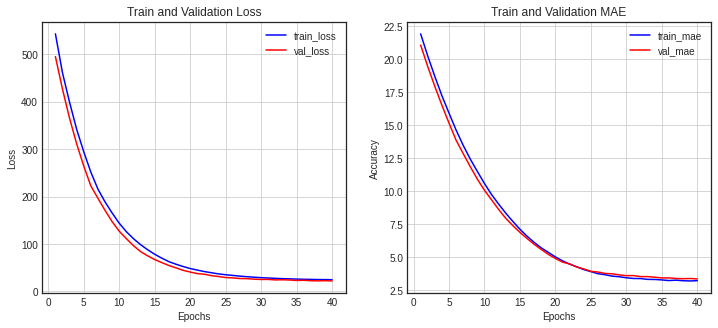

In [38]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.plot(history.history['mae'])
# plt.plot(history.history['mse'])
# plt.xlabel('Epoch')
# plt.legend(['mae','mse'])
# plt.show();

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [39]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 22.1481 - mae: 3.3751


[22.148136138916016, 3.3751025199890137]

In [40]:
result = model.predict(test_data)

# plt.scatter(test_data[''], test_labels)
# plt.plot(test_data, result, 'r')
# plt.show()

## Reuters 딥러닝 모델
이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

### 데이터 로드 및 전처리
reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, callbacks, utils
from keras.datasets import reuters

In [6]:
# 문제 2-1: reuters 데이터셋을 로드하고 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

# 훈련, 검증, 테스트

8982
2246
46
